In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [3]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [4]:
def plot_coef(X,model,name=None):
    

    plt.bar(X.columns[2:],abs(model.coef_[2:]))
    plt.xticks(rotation=90)
    plt.ylabel("$coefficients$")
    plt.title(name)
    plt.show()
    print("R^2 on training  data ",model.score(X_train, y_train))
    print("R^2 on testing data ",model.score(X_test,y_test))

In [5]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [6]:
data = pd.read_csv('movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [22]:
data.drop('movie_imdb_link',axis=1,inplace=True)

In [23]:
data["color"].value_counts()
data.drop('color',axis=1,inplace=True)

In [24]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [25]:
data.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [26]:
data.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [27]:
data.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'],inplace=True)

In [28]:
data.shape

(4735, 26)

In [29]:
data["content_rating"].fillna("R", inplace = True)

In [31]:
data["aspect_ratio"].fillna(data["aspect_ratio"].median(),inplace=True)

In [33]:
data["budget"].fillna(data["budget"].median(),inplace=True)

In [34]:
data['gross'].fillna(data['gross'].median(),inplace=True)

In [35]:
data.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [103]:
data.drop_duplicates(inplace=True)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4693 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4693 non-null   int64  
 1   num_critic_for_reviews     4693 non-null   float64
 2   duration                   4693 non-null   float64
 3   director_facebook_likes    4693 non-null   float64
 4   actor_3_facebook_likes     4693 non-null   float64
 5   actor_2_name               4693 non-null   int64  
 6   actor_1_facebook_likes     4693 non-null   float64
 7   gross                      4693 non-null   float64
 8   genres                     4693 non-null   int64  
 9   actor_1_name               4693 non-null   int64  
 10  movie_title                4693 non-null   int32  
 11  num_voted_users            4693 non-null   int64  
 12  cast_total_facebook_likes  4693 non-null   int64  
 13  actor_3_name               4693 non-null   object 
 1

In [104]:
from sklearn.preprocessing import LabelEncoder

In [118]:
data

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,...,country_Soviet Union,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_UK,country_USA,country_West Germany
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,avatar|future|marine|native|paraplegic,...,False,False,False,False,False,False,False,False,True,False
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,goddess|marriage ceremony|marriage proposal|pi...,...,False,False,False,False,False,False,False,False,True,False
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,bomb|espionage|sequel|spy|terrorist,...,False,False,False,False,False,False,False,True,False,False
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,deception|imprisonment|lawlessness|police offi...,...,False,False,False,False,False,False,False,False,True,False
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,alien|american civil war|male nipple|mars|prin...,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,35.0,80.0,0.0,0.0,0.0,70071.0,589,0,0.0,jihad|mindanao|philippines|security guard|squa...,...,False,False,False,False,False,False,False,False,False,False
5035,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,assassin|death|guitar|gun|mariachi,...,False,False,False,False,False,False,False,False,True,False
5037,14.0,95.0,0.0,133.0,296.0,4584.0,1338,690,1.0,written and directed by cast member,...,False,False,False,False,False,False,False,False,True,False
5038,1.0,87.0,2.0,318.0,637.0,26027495.0,629,2283,2.0,fraud|postal worker|prison|theft|trial,...,False,False,False,False,False,False,False,False,False,False


In [128]:
label_encoder = LabelEncoder()
#data['director_name'] = label_encoder.fit_transform(data['director_name'])
#data['actor_1_name'] = label_encoder.fit_transform(data['actor_1_name'])
#data['actor_2_name'] = label_encoder.fit_transform(data['actor_2_name'])
#data['genres'] = label_encoder.fit_transform(data['genres'])
#data['movie_title'] = label_encoder.fit_transform(data['movie_title'])
categorical_columns=['content_rating']

for column in categorical_columns:
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])

# Drop the original categorical columns if needed
data = data.drop(categorical_columns, axis=1)
#'director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title','language','country',

In [129]:
X=data.drop('imdb_score',axis=1)
y=data.imdb_score

In [130]:
X

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_UK,country_USA,country_West Germany,plot_keywords_encoded,content_rating_encoded
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,False,False,False,False,False,False,True,False,1279,7
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,False,False,False,False,False,False,True,False,4153,7
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,False,False,False,False,False,True,False,False,2014,7
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,False,False,False,False,False,False,True,False,3383,7
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,False,False,False,False,False,False,True,False,630,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,35.0,80.0,0.0,0.0,0.0,70071.0,589,0,0.0,35.0,...,False,False,False,False,False,False,False,False,4359,5
5035,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,...,False,False,False,False,False,False,True,False,1150,9
5037,14.0,95.0,0.0,133.0,296.0,4584.0,1338,690,1.0,14.0,...,False,False,False,False,False,False,True,False,4608,5
5038,1.0,87.0,2.0,318.0,637.0,26027495.0,629,2283,2.0,6.0,...,False,False,False,False,False,False,False,False,4016,9


In [131]:
y

0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
       ... 
5034    6.3
5035    6.9
5037    6.4
5038    7.7
5042    6.6
Name: imdb_score, Length: 4693, dtype: float64

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 470
number of training samples: 4223


In [133]:
lm=LinearRegression()
lm.fit(X_train, y_train)
predicted=lm.predict(X_test)
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.9999999999348788
R^2 on testing data  -0.2634764330736681


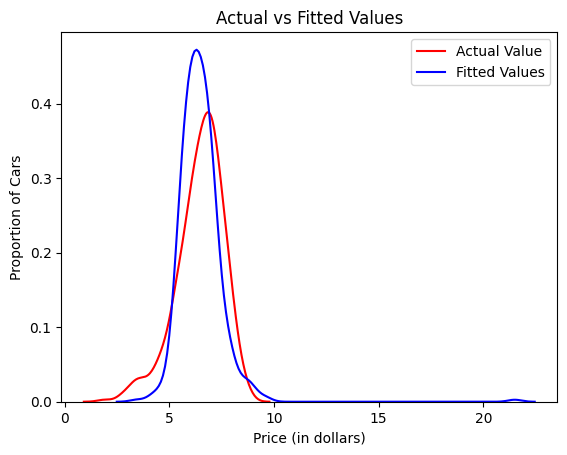

In [134]:
plot_dis(y_test,predicted)

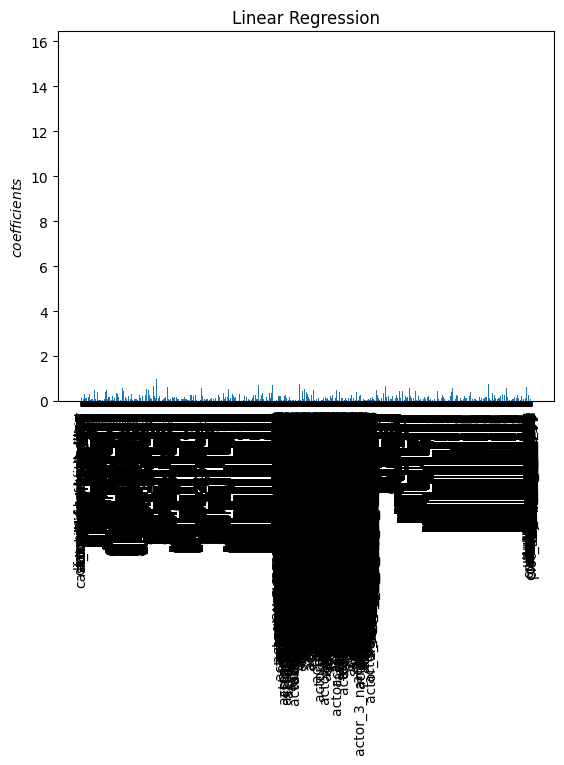

R^2 on training  data  0.9999999999348788
R^2 on testing data  -0.2634764330736681


In [135]:
plot_coef(X,lm,name="Linear Regression")

In [136]:
param_grid = {
    "polynomial__degree": [1,2,3,4],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

In [137]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Ridge(alpha=1))]
pipe = Pipeline(Input)

In [138]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)

search.fit(X_train, y_train)
search

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4]})

In [139]:
pd.DataFrame(search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_polynomial__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,20.162696,2.079177,0.875945,0.107932,0.0001,1,"{'model__alpha': 0.0001, 'polynomial__degree': 1}",0.311978,0.316921,0.265907,0.308464,0.284789,0.297612,0.019322,6
1,2.346064,0.229652,0.000000,0.000000,0.0001,2,"{'model__alpha': 0.0001, 'polynomial__degree': 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,1.952581,0.232904,0.000000,0.000000,0.0001,3,"{'model__alpha': 0.0001, 'polynomial__degree': 3}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,1.686601,0.069012,0.000000,0.000000,0.0001,4,"{'model__alpha': 0.0001, 'polynomial__degree': 4}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,15.476883,1.194127,0.824821,0.058350,0.001,1,"{'model__alpha': 0.001, 'polynomial__degree': 1}",0.312200,0.316938,0.266046,0.308540,0.285007,0.297746,0.019292,4


In [140]:
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)

best_score_:  0.2977608330471865
best_params_:  {'model__alpha': 0.1, 'polynomial__degree': 1}


In [141]:
predict = search.predict(X_test)

predict

array([7.00073047, 6.74232659, 6.00994837, 6.75453131, 6.27162789,
       6.58425541, 6.63542492, 6.96903088, 6.51054879, 7.50643177,
       6.8042724 , 6.73791028, 6.55990701, 6.37706093, 6.64960341,
       5.22629179, 6.13424075, 7.45231931, 6.96445941, 6.31782098,
       6.39403213, 6.84266449, 6.58500628, 6.1936625 , 6.5052129 ,
       6.43907518, 5.50700237, 6.11285438, 6.76102804, 6.51367581,
       6.45788674, 6.48026215, 6.79058404, 6.24337789, 6.15321332,
       6.37484436, 6.0514581 , 6.36154535, 6.09461558, 6.57342254,
       6.78265603, 6.31893766, 6.1451783 , 6.21848185, 6.57752061,
       5.82990044, 6.62654566, 6.37416555, 6.55171533, 6.45175183,
       8.3896517 , 5.92994466, 6.58199244, 6.85986566, 6.21737028,
       6.1000051 , 5.9000074 , 6.7740074 , 6.92006184, 6.22532479,
       7.79999308, 6.7026489 , 5.80723769, 6.59717086, 6.18118816,
       6.04673419, 6.02733289, 6.39716854, 6.33446702, 7.11397917,
       5.72728669, 6.45707589, 5.8585109 , 6.23326416, 7.57839

In [142]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=0.1))])

In [143]:
best.score(X_test, y_test)

0.29205974645625

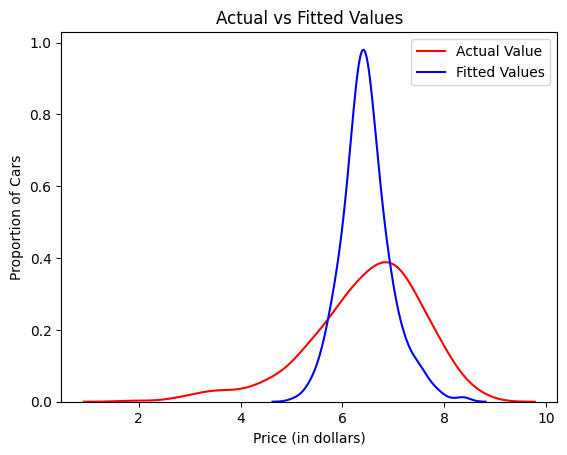

In [144]:
plot_dis(y_test,predict)